<a href="https://colab.research.google.com/github/JunHyeong-data/Basic-Deep-Learning/blob/main/02_loss_function%EA%B3%BC_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 기초 ②
## Loss Function과 Gradient Descent

---

## 1. 강의 목표
이번 강의의 목표는 다음과 같다.
- 딥러닝에서 **Loss Function의 역할** 이해
- 모델의 파라미터를 학습하는 **Gradient Descent 원리** 이해
- 실제 딥러닝 학습이 어떻게 이루어지는지 직관적으로 파악

복잡한 뉴럴 네트워크 구조는 잠시 잊고, **Loss와 최적화(Optimization)** 에만 집중한다.

---

## 2. 이전 내용 복습
이전 강의에서는 TensorFlow Playground를 통해 다음을 확인했다.
- 단순한 데이터 분포 $\rightarrow$ Linear Classifier만으로도 분류 가능
- 복잡한 데이터 분포 $\rightarrow$ Hidden Layer와 Nonlinear Activation Function 필요
- 여러 Hidden Layer를 가지는 구조를 **Deep Neural Network**라고 부른다.

이번 강의에서는 👉 **이러한 모델의 weight 값을 어떻게 찾는지**를 다룬다.

---

## 3. 문제 설정: Regression
설명을 단순화하기 위해 Classification이 아닌 **Regression 문제**를 사용한다.

### 문제 정의
- 주어진 데이터: 몇 개의 점 $(x_i, y_i)$
- 목표: 데이터를 가장 잘 따라가는 **직선** 찾기

직선은 다음과 같이 정의한다.
$$y = ax + b$$

---

## 4. Loss Function 정의
모델이 데이터를 얼마나 잘 설명하는지를 수치로 나타내기 위해 **Loss Function**을 정의한다.

### Mean Squared Error (MSE)
각 데이터 포인트에 대해 예측값과 실제값의 차이를 계산한다.
$$L(a, b) = \frac{1}{N} \sum_{i=1}^{N} (ax_i + b - y_i)^2$$

- Loss 값이 작을수록 모델은 데이터를 잘 설명한다.
- Loss가 최소가 되는 지점이 우리가 찾는 해이다.

> Loss 함수는 반드시 이 형태일 필요는 없으며 절댓값, 직각 거리 등 다양한 방식으로 정의할 수 있다.

---

## 5. 문제 단순화
설명을 더 쉽게 하기 위해 문제를 단순화한다.
- 절편 $b = 0$으로 고정
- **기울기 $a$만 학습**

Loss 함수는 다음과 같이 바뀐다.
$$L(a) = \frac{1}{N} \sum_{i=1}^{N} (ax_i - y_i)^2$$

이제 문제는 👉 **Loss를 최소화하는 $a$를 찾는 문제**가 된다.

---

## 6. Loss의 직관적 이해
- $a$가 너무 크면 $\rightarrow$ 예측값이 커져 Loss 증가
- $a$가 너무 작아도 $\rightarrow$ 예측값이 작아 Loss 증가
- 적절한 $a$에서 Loss는 최소값을 가진다.

Loss를 $a$에 대해 그래프로 그리면 👉 **U자 형태의 곡선(Convex)**이 된다.



---

## 7. 왜 미분으로 바로 못 푸는가?
이 예제에서는 $\frac{dL}{da} = 0$을 직접 계산할 수 있다. 하지만 실제 딥러닝에서는 다음과 같은 이유로 불가능하다.
- 파라미터 수: 수십만 ~ 수백만 개
- Loss 계산 과정: 매우 복잡 (비선형 활성화 함수 포함)
- 전체 수식을 수식으로 미분하는 것은 불가능에 가까움

👉 따라서 **반복적인 최적화 방법**을 사용한다.

---

## 8. Gradient Descent 개념
Gradient Descent는 Loss를 줄이는 방향으로 **조금씩 이동하면서 최적값을 찾는 방법**이다.

### 기본 아이디어
1. 초기값 $a_0$ 설정
2. 현재 위치에서 Loss의 기울기 계산
3. 기울기 반대 방향으로 이동
4. 이를 반복하여 최소점에 수렴



---

## 9. Gradient Descent 수식
$$a^{(t+1)} = a^{(t)} - \eta \frac{dL}{da}$$

- $\eta$: Learning Rate (학습률)
- 기울기가 클수록 이동 폭이 커진다.
- 기울기가 0에 가까워질수록 업데이트 폭이 작아진다.

---

## 10. PyTorch를 이용한 학습 개요
실제 구현에서는 PyTorch의 자동 미분 기능을 사용한다.

### 핵심 흐름
1. 데이터 $\rightarrow$ Tensor로 변환
2. 파라미터 $a$ 선언 (`requires_grad=True`)
3. Loss 계산
4. `loss.backward()`로 미분값 계산
5. Gradient Descent로 파라미터 업데이트
6. Gradient 초기화 후 반복

---

## 11. Learning Rate의 영향
### Learning Rate가 너무 큰 경우
- 한 번에 너무 크게 이동하여 최소점을 지나쳐 발산 (Overshooting)
- 학습 실패

### Learning Rate가 너무 작은 경우
- 이동 폭이 너무 작아 학습 속도가 매우 느림

👉 적절한 Learning Rate 선택이 중요하다.

[Image comparing learning rates: small learning rate, large learning rate causing divergence, and optimal learning rate]

---

## 12. 결과 해석
- 반복(iteration)을 거칠수록 $\frac{dL}{da} \to 0$에 가까워짐
- Loss를 최소화하는 기울기 $a \approx 1.44$에 수렴 (예시 데이터 기준)

---

## 13. 정리
- 딥러닝 학습은 **Loss 최소화 문제**이다.
- Gradient Descent는 반복적인 최적화 방법이다.
- 실제 딥러닝에서는 파라미터 수가 매우 많고 Loss 구조가 복잡하므로 미분값 계산은 **Backpropagation**으로 수행된다.

👉 **다음 강의: Backpropagation 알고리즘**

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git
# 이 명령어는 GitHub에 저장된 특정 오픈소스 프로젝트(deepLearning)의 모든 파일과 폴더를 당신의 컴퓨터(또는 현재 작업 환경)로 그대로 복사(다운로드)해오라는 의미입니다.

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 24.72 MiB/s, done.
Resolving deltas: 100% (116/116), done.


0   -2.000000
1   -1.166667
2   -0.333333
3    0.500000
4    1.333333
5    2.166667
6    3.000000
Name: x, dtype: float64
0   -3.307412
1   -2.072027
2   -1.024187
3    0.743696
4    2.004935
5    2.630819
6    4.153398
Name: y, dtype: float64


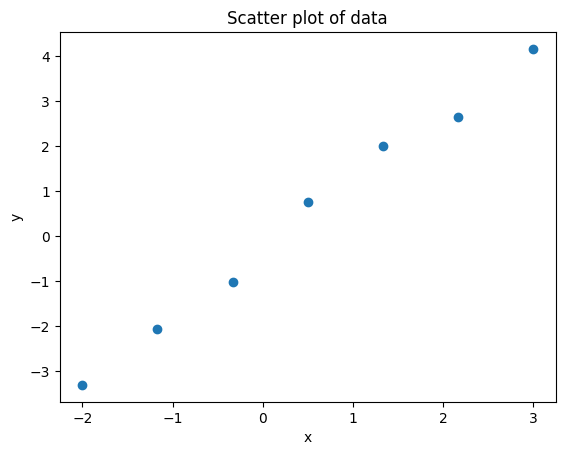

In [6]:
"""
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv('./deepLearning/nn/points7.csv')

x = data['x']
y = data['y']

plt.scatter(x=x,y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()
"""
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./deepLearning/nn/points7.csv')

x = data['x']
y = data['y']
print(x)
print(y)
plt.scatter(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()

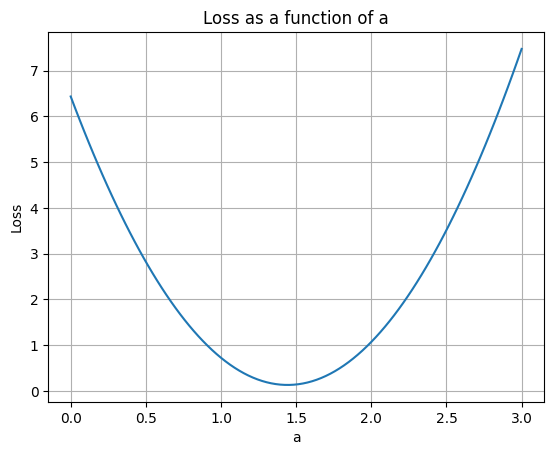

In [4]:
"""
import numpy as np

a_values = np.linspace(0, 3, 100)

# Calculate loss for each a value
loss_values = []
for a in a_values:
    loss = np.mean((a * x - y) ** 2)  # Calculate the mean squared loss
    loss_values.append(loss)

# Plot the loss values
plt.plot(a_values, loss_values)
plt.xlabel('a')
plt.ylabel('Loss')
plt.title('Loss as a function of a')
plt.grid(True)
plt.show()
"""
import numpy as np

a_values = np.linspace(0, 3, 100)

loss_values = []
for a  in a_values:
  loss = np.mean((a*x - y) ** 2)
  loss_values.append(loss)

plt.plot(a_values, loss_values)
plt.xlabel('a')
plt.ylabel('Loss')
plt.title('Loss as a function of a')
plt.grid(True)
plt.show()
# 평균 제곱 오차 (MSE): (예측 - 실제)**2의 평균을 구합니다.
# 이것은 실제값 $y$와 예측값이 얼마나 동떨어져 있는지를 수치화한 것입니다.저장: 각 $a$에 대응하는 오차값을 리스트에 차곡차곡 쌓습니다.

In [5]:
"""
import numpy as np

def loss_fn(x: np.ndarray, y: np.ndarray, a: float) -> float:
    loss = np.mean((a * x - y) ** 2)
    return loss

a = 3.0
h = 0.001

print(loss_fn(x,y,a))
print(loss_fn(x,y,a+h))
print(loss_fn(x,y,a-h))
"""
import numpy as np

def loss_fn(x:np.ndarray, y:np.ndarray, a: float) -> float:
    loss = np.mean((a * x - y) ** 2)
    return loss

a = 3.0
h = 0.001

print(loss_fn(x, y, a))
print(loss_fn(x, y, a+h))
print(loss_fn(x, y, a-h))

"""
2. 매개변수와 타입 힌트 (입력 부분)
함수 괄호 안은 이 함수가 실행될 때 필요한 재료들입니다.

x: np.ndarray: 첫 번째 입력인 x는 NumPy의 배열(Array) 형태여야 한다는 뜻입니다. (예: 입력 데이터들)

y: np.ndarray: 두 번째 입력인 y 역시 NumPy 배열이어야 합니다. (예: 실제 정답들)

a: float: 세 번째 입력인 a는 실수(Floating point) 형태여야 합니다. (예: 우리가 찾고 싶은 기울기 값)

3. -> float (출력 부분)
함수가 모든 계산을 마친 후 **최종적으로 내뱉는 결과값(Return value)의 타입이 실수(float)**임을 알려줍니다. 오차는 보통 0.5, 1.24 같은 숫자로 나오기 때문입니다.
"""

7.47173131231991
7.4811641554628405
7.462304524732537


In [7]:
"""
import torch

# Convert x and y to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

a_tensor = torch.tensor(3.0, requires_grad=True)

for idx in range(10):
    loss = torch.mean((a_tensor * x_tensor - y_tensor) ** 2)
    grad = loss.backward()
    print(f"a value: {a_tensor.item()}, dl/da :  {a_tensor.grad}" )
    with torch.no_grad():
        a_tensor -= 0.1 * a_tensor.grad

    # Reset gradients
    a_tensor.grad.zero_()
"""

import torch

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

a_tensor = torch.tensor(3.0, requires_grad=True)
# requires_grad=True: 이 텐서와 관련된 모든 연산을 PyTorch가 기록하라는 의미입니다. 나중에 loss.backward()를 호출할 때 이 기록을 바탕으로 미분값을 계산합니다.
for idx in range(10):
  loss = torch.mean((a_tensor * x_tensor - y_tensor) ** 2 )
  grad = loss.backward()
  # loss.backward(): PyTorch의 마법 같은 부분입니다. 복잡한 수식의 미분을 자동으로 수행하여 a_tensor.grad에 기울기 값을 저장합니다.
  print(f"a value: {a_tensor.item()}, dl/da: {a_tensor.grad}")
  with torch.no_grad():
  # with torch.no_grad(): 업데이트 과정 자체는 미분 기록에 남길 필요가 없으므로 잠시 추적을 끕니다. (메모리 절약)
    a_tensor -= 0.1 * a_tensor.grad
  a_tensor.grad.zero_()
  # PyTorch는 backward()를 할 때마다 기존 기울기 값에 새로운 값을 더하는(Accumulate) 성질이 있습니다. 따라서 다음 루프를 돌기 전에 반드시 0으로 비워줘야 합니다.

a value: 3.0, dl/da: 9.429816246032715
a value: 2.057018280029297, dl/da: 3.7195372581481934
a value: 1.6850645542144775, dl/da: 1.4671509265899658
a value: 1.5383495092391968, dl/da: 0.5787095427513123
a value: 1.4804785251617432, dl/da: 0.22826877236366272
a value: 1.4576516151428223, dl/da: 0.09003896266222
a value: 1.4486477375030518, dl/da: 0.03551575168967247
a value: 1.4450961351394653, dl/da: 0.014008680358529091
a value: 1.443695306777954, dl/da: 0.005526029039174318
a value: 1.4431426525115967, dl/da: 0.0021789169404655695
